<a href="https://colab.research.google.com/github/sancarhacer/DataSciencewithPython/blob/main/12_UnbalancingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
# random seed
np.random.seed(42)

# imbalanced data set
set1no= 900
set2no= 100

In [ ]:
## dataframe with imbalanced data set
df1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=set1no),
    'feature_2': np.random.normal(loc=0, scale=1, size=set1no),
    'target': [0] * set1no
})

df2 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=set2no),
    'feature_2': np.random.normal(loc=2, scale=1, size=set2no),
    'target': [1] * set2no
})

In [ ]:
df=pd.concat([df1,df2]).reset_index(drop=True)
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,1.629989,3.070150,1
996,1.741204,1.973479,1
997,3.598647,1.118125,1
998,2.560919,1.836933,1


In [ ]:
df.count()

,0
feature_1,1000
feature_2,1000
target,1000


In [ ]:
df['target'].unique()

array([0, 1])

In [ ]:
df['target'].value_counts()

,count
target,
0,900
1,100


## upsampling

Dengesiz Veri Kümeleriyle Başa Çıkmada:

Bir veri kümesindeki azınlık sınıfının örnek sayısını artırarak sınıflar arasındaki dengesizliği gidermeye yönelik bir tekniktir.

Amaç, modelin azınlık sınıfını daha iyi öğrenmesini sağlamak ve böylece genel performansı iyileştirmektir.

Bu, genellikle azınlık sınıfından mevcut örnekleri kopyalayarak veya sentetik (yapay) yeni örnekler oluşturarak (örneğin SMOTE gibi yöntemlerle) yapılır

In [ ]:
df_minority=df[df['target']==1]
df_minority

,feature_1,feature_2,target
900,3.901191,2.696954,1
901,1.939339,1.666181,1
902,1.291593,3.173125,1
903,0.486286,2.369642,1
904,0.196860,1.892698,1
...,...,...,...
995,1.629989,3.070150,1
996,1.741204,1.973479,1
997,3.598647,1.118125,1
998,2.560919,1.836933,1


In [ ]:
df_majority=df[df["target"]==0]

In [ ]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)
# Azınlık sınıfını (df_minority) yukarı örnekle (upsample):
# 1. replace=True: Yeniden örnekleme yaparken aynı örneği tekrar seçmeye izin ver (yedekli örnekleme).
# 2. n_samples=len(df_majority): Azınlık sınıfının yeni örnek sayısını, çoğunluk sınıfının sayısına eşitle.
# 3. random_state=42: Tekrarlanabilir sonuçlar elde etmek için rastgelelik durumunu belirle.

In [ ]:
df_minority_upsampled.shape

(900, 3)

In [ ]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [ ]:
df_upsampled.shape

(1800, 3)

## down sampling -> generally less preferable

In [ ]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [ ]:
df_majority_downsampled=resample(df_majority,replace=True,
         n_samples=len(df_minority),
         random_state=42
        )

In [ ]:
df_majority_downsampled.shape

(100, 3)

In [ ]:
df_downsampled=pd.concat([df_minority,df_majority_downsampled])

In [ ]:
df_downsampled.shape

(200, 3)

##SMOTE
SMOTE (Sentetik Azınlık Yukarı Örnekleme Tekniği), azınlık sınıfının sentetik (yapay) örneklerini, mevcut örnekler arasında interpolasyon (ara değer bulma) yaparak oluşturur.

upsampling için kullanılan yöntemlerden biri

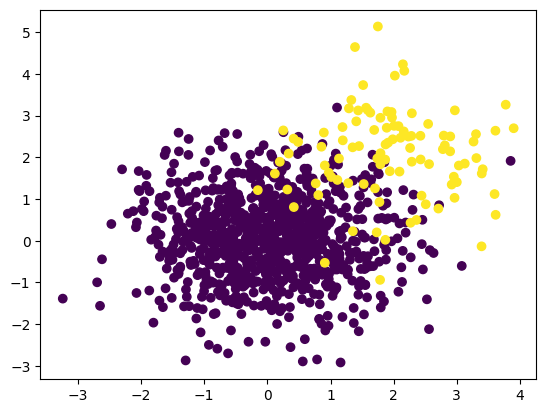

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['feature_1'],df['feature_2'],c=df['target'])

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
# SMOTE nesnesini oluştur. Bu nesne, sentetik örnekler oluşturmak için kullanılacak.

In [ ]:

# 1. df[['feature_1', 'feature_2']]: Özellik sütunlarını (X) giriş olarak kullan.
# 2. df['target']: Hedef sütununu (y) giriş olarak kullan.
# fit_resample metodu, hem algoritmayı verilere uyarır (fit) hem de azınlık sınıfını yukarı örnekleyerek (resample) yeni, dengelenmiş X ve y'yi döndürür.
X,y=oversample.fit_resample(df[['feature_1','feature_2']],df['target'])

In [ ]:
X

,feature_1,feature_2
0,0.496714,0.368673
1,-0.138264,-0.393339
2,0.647689,0.028745
3,1.523030,1.278452
4,-0.234153,0.191099
...,...,...
1795,2.701868,1.826691
1796,3.545917,0.664057
1797,3.358114,1.774219
1798,2.486916,1.852372


In [ ]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1795,1
1796,1
1797,1
1798,1


In [ ]:
df1=pd.DataFrame(X,columns=['feature_1','feature_2'])
df2=pd.DataFrame(y,columns=['target'])

# Yeni özellikler (df1) ve hedef etiketlerini (df2) yatay olarak (axis=1) birleştirerek
# dengelenmiş son DataFrame'i (oversample_df) oluştur.
oversample_df=pd.concat([df1,df2],axis=1)

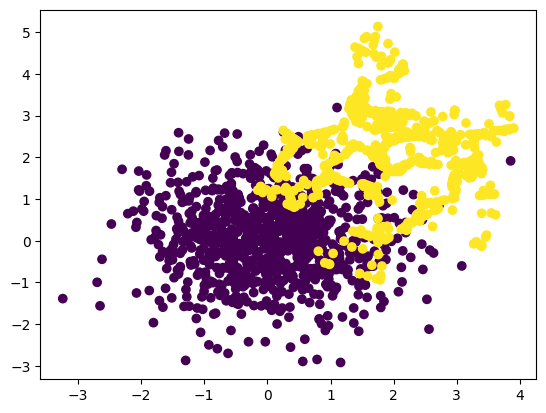

In [ ]:
plt.scatter(
    oversample_df['feature_1'],   # x eksenindeki değerler
    oversample_df['feature_2'],   # y eksenindeki değerler
    c=oversample_df['target']     # renkler (class/label bilgisine göre)
)


In [ ]:
oversample_df['target'].value_counts()

,count
target,
0,900
1,900
